# Bellabeat: How Can A Wellness Technology Company Play It Smart?
***
Project by: Amolvir Taunque
# STEP 1: ASK

#### 1.0 Background
Bellabeat, established in 2013 by Urška Sršen and Sando Mur, is a high-tech company specializing in health-focused smart products designed to empower women with insights into their health and habits. The company rapidly expanded its global presence, offering a range of wellness devices while emphasizing digital marketing strategies. Recognizing untapped potential, Bellabeat's co-founder, Urška Sršen, has tasked the marketing analytics team with analyzing non-Bellebeat smart device usage data to inform high-level marketing recommendations and spur further growth.

#### 1.2 Business Task:
<span style="color:#FFD700;">
Analyze health trend insights from FitBit wearable devices to refine Bellabeat's marketing strategy and drive product innovation, ultimately enhancing company growth and market competitiveness.
</span>

#### 1.3 Business Objectives:  
1. What are the health and wearable usage trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### 1.4 Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualizations and key findings
6. High-level content recommendations based on the analysis

#### 1.5 Key Stakeholders:
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.

***

# STEP 2: PREPARE

#### 2.1 Information on Data Source:
1. The data is publicly available on [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) and stored in 18 csv files. 
2. Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
3. 30 FitBit users who consented to the submission of personal tracker data.
4. Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.
5. Metadata can be found at [Metadata: FitBit Fitness Tracker Data](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf)
    
#### 2.2 Limitations of Data Set:
1. The data set comprises responses from only 30 individuals, without any accompanying demographic information such as gender, age, health conditions, or lifestyle details. Health trends are known to be heavily influenced by these factors, and the absence of such background information can lead to an incomplete and potentially biased analysis of the data.
2. The data was collected in the year 2016, which raises concerns about its current relevance. Lifestyle factors, including daily activities, fitness routines, sleep patterns, and dietary preferences, can change significantly over time. Consequently, the data may not accurately reflect the current health landscape.
3. The data collection methodology relies on surveys, which may raise questions about the precision and reliability of responses. Additionally, certain data points are self-reported, further complicating our assessment of data accuracy and reliability.
4. The Metadata lacks details and explanation of criteria used to label activity intesity. 

#### 2.3 Is Data ROCCC?
A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.
1. Reliable - LOW - Not reliable as it only has 30 respondents. Also, after exploring the data we see that these respondents don't provide complete data.
2. Original - LOW - Third party provider (Amazon Mechanical Turk)
3. Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
4. Current - LOW - Data is 7 years old and is not relevant
5. Cited - LOW - Data collected from third party, hence unknown

Overall, this dataset is considered of poor quality, and it is not recommended to base business recommendations on it due to its limited reliability, originality, and current relevance.

#### 2.4 Data Selection:
The following files are selected and downloaded for analysis. 
```
    • dailyActivity_merged.csv
    • hourlySteps_merged.csv
    • minuteIntensitiesNarrow_merged.csv
    • minuteCaloriesNarrow_merged.csv
    • sleepDay_merged.csv
```

***

# STEP 3: PROCESS

We are using Python to prepare and process the data.


#### 3.1 Preparing the Environment

The ```numPy, pandas, matplotlib, datetime``` packages are installed and aliased for easy reading.

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np

In [64]:
pd.set_option('display.max_columns',65)
pd.set_option('display.max_rows',65)
plt.style.use('seaborn-v0_8')

### 3.2 Importing And Cleaning Up The Data:

Use Pandas to import the csv files. Since all files have a date or time column we will use the parse dates and convert them to datetime at import. 

In [17]:
d_parser_daily = lambda x: datetime.strptime(x, '%m/%d/%Y')
d_parser_hour = lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')
d_parser_sleep = lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p').date()

# Activity Files
activity_merged = pd.read_csv('Fitabase Data/Daily Activity/dailyActivity_merged.csv',parse_dates=['ActivityDate'],date_parser= d_parser_daily)
hourly_steps = pd.read_csv('Fitabase Data/Steps/hourlySteps_merged.csv',parse_dates=['ActivityHour'],date_parser= d_parser_hour)
intensity_minute = pd.read_csv('Fitabase Data/Intensities/minuteIntensitiesNarrow_merged.csv',parse_dates=['ActivityMinute'],date_parser= d_parser_hour)
calories_minute = pd.read_csv('Fitabase Data/Calories/minuteCaloriesNarrow_merged.csv',parse_dates=['ActivityMinute'],date_parser= d_parser_hour)

#Sleep Files
sleep_daily = pd.read_csv('Fitabase Data/Sleep/sleepDay_merged.csv',parse_dates=['SleepDay'],date_parser= d_parser_sleep)


Exlore datasets and check if there are the same number of respondents (30) providing data in all datasets


In [45]:
dataframes = [activity_merged, hourly_steps, intensity_minute, calories_minute, sleep_daily]

# Loop through each DataFrame to see information
for df in dataframes:
    # See Overview of Tables
    display(df.head(3))
    
    #Check if there are the same number of members providing data in all datasets
    print(f"\nNumber of Members: {df['Id'].unique().size}\n")

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776



Number of Members: 33



,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151



Number of Members: 33



,Id,ActivityMinute,Intensity
0,1503960366,2016-04-12 00:00:00,0
1,1503960366,2016-04-12 00:01:00,0
2,1503960366,2016-04-12 00:02:00,0



Number of Members: 33



,Id,ActivityMinute,Calories
0,1503960366,2016-04-12 00:00:00,0.7865
1,1503960366,2016-04-12 00:01:00,0.7865
2,1503960366,2016-04-12 00:02:00,0.7865



Number of Members: 33



,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442



Number of Members: 24



Steps to clean data:
1. Use .info() to display comprehensive information about the dataset such as data types, non-null counts, and row/column count and descriptions
2. Remove duplicates using .drop_duplicates()
3. Check for null values. These data sets have none so no further need to .dropna() or .fillna()


In [46]:
# List of DataFrames to make life easier with cleaning each file in the same way
dataframes = [activity_merged, hourly_steps, intensity_minute, calories_minute, sleep_daily]

# Loop through each DataFrame for cleaning
for df in dataframes:
    # Display comprehensive information about the dataset such as data types, non-null counts, and row/column count and descriptions
    df.info()

    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Check for null values. These data sets have none so no further need to .dropna() or .fillna()
    null_counts = df.isnull().sum()
    print(f"Null Value Counts:")
    print(null_counts)
    print(f"\n{'*'*50}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

***
# STEP 4: ANALYZE + STEP 5: SHARE

Perform calculations, create visualizations and communicate our findings based on our analysis.

### **Sleep Trends**


In [270]:
#How is time spent in bed each day? (Sleep Efficiency)
grouped_sleep = sleep_daily.groupby(['Id']).mean(numeric_only=True)
grouped_sleep = grouped_sleep.reset_index()
grouped_sleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,1.08,360.280000,383.200000
1,1644430081,1.00,294.000000,346.000000
2,1844505072,1.00,652.000000,961.000000
3,1927972279,1.60,417.000000,437.800000
4,2026352035,1.00,506.178571,537.642857


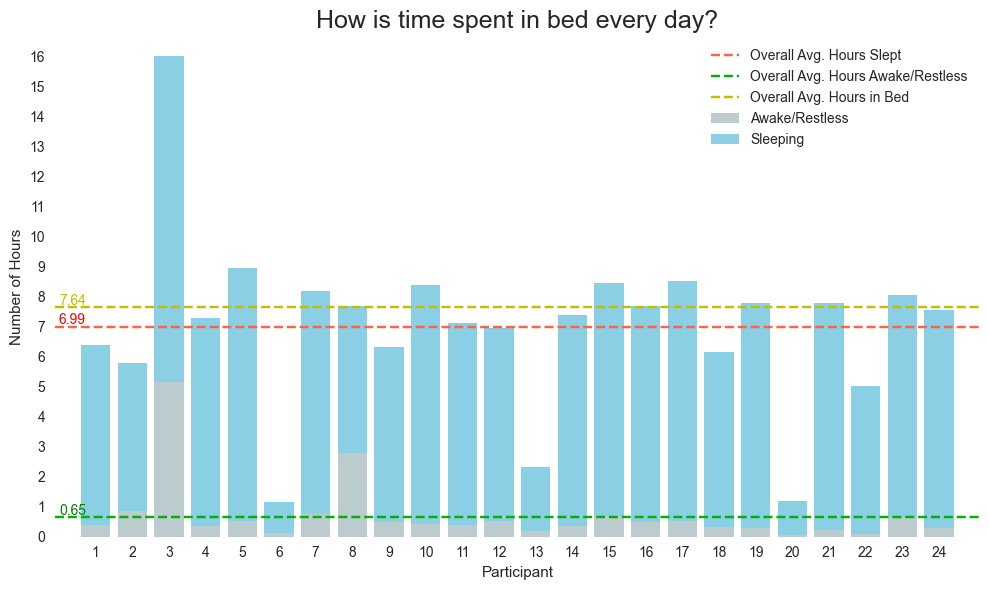

In [439]:
#How is time spent in bed each day? (Sleep Efficiency)
# x and y values
hours_slept = grouped_sleep['TotalMinutesAsleep'] / 60
not_asleep = (grouped_sleep['TotalTimeInBed'] - grouped_sleep['TotalMinutesAsleep']) / 60
participant = grouped_sleep.index

# average values
average_sleep_total = sleep_daily['TotalMinutesAsleep'].mean() / 60
average_awake_total = (sleep_daily['TotalTimeInBed'] - sleep_daily['TotalMinutesAsleep']).mean() / 60
average_bed_total = sleep_daily['TotalTimeInBed'].mean() / 60

#Plot
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor("white")

plt.bar(participant, not_asleep, color='#bccbce', label='Awake/Restless')
plt.bar(participant, hours_slept, bottom=not_asleep, color='#8acfe3', label='Sleeping')

# Add horizontal lines for average values 
plt.axhline(y=average_sleep_total, color='#FF6347', linestyle='--', label='Overall Avg. Hours Slept')  
plt.axhline(y=average_awake_total, color='#00B200', linestyle='--', label='Overall Avg. Hours Awake/Restless')  
plt.axhline(y=average_bed_total, color='y', linestyle='--', label='Overall Avg. Hours in Bed')  

# Add text labels for the average values
plt.text(len(participant) - 25, average_sleep_total +0.1, f'{average_sleep_total:.2f}',color='r')
plt.text(len(participant) - 25, average_awake_total +0.08, f'{average_awake_total:.2f}',color='g')
plt.text(len(participant) - 25, average_bed_total +0.08, f'{average_bed_total:.2f}',color='y')

#Formatting
plt.title("How is time spent in bed every day?",fontsize = 18)
plt.xlabel("Participant")
plt.ylabel("Number of Hours")
plt.xticks(participant, participant + 1)
plt.yticks(range(0, int(max(hours_slept+not_asleep)) + 2, 1))

plt.legend()
plt.margins(x=0.03,y=0.04)

plt.tight_layout()
plt.show()


##### **How is time spent in bed each day (Sleep Efficiency)?**
On average, Fitbit users spend 7.64 hours in bed each day, with 7 hours dedicated to sleep each night.
Additionally, they experience approximately 40 minutes of wakefulness or restlessness while in bed.

In [278]:
# Does More Daily Excercise Give Better Sleep?

merged_data = activity_merged.merge(sleep_daily, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'], how='inner')
merged_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,1,700,712


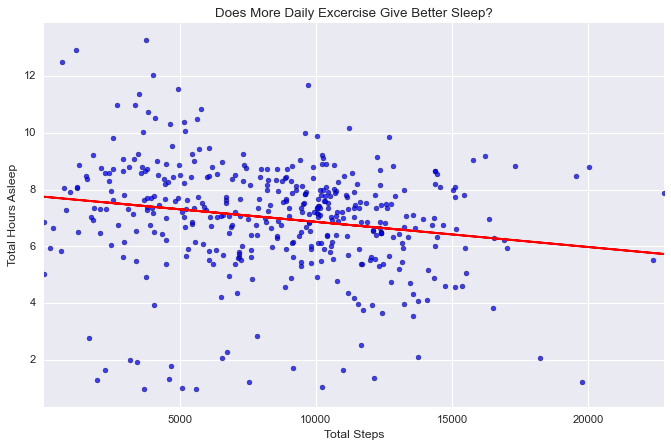

In [277]:
# Does More Daily Excercise Give Better Sleep?

plt.figure(figsize=(10, 6))

x_val = merged_data['TotalSteps']
y_val = merged_data['TotalMinutesAsleep']/60
plt.scatter(x_val,y_val,edgecolor='black',alpha =0.75)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x_val, y_val, 1)

#add linear regression line to scatterplot 
plt.plot(x_val, m*x_val+b,color='r')

plt.title('Does More Daily Excercise Give Better Sleep?')
plt.xlabel('Total Steps')
plt.ylabel('Total Hours Asleep')



plt.margins(x=0)


plt.show()

##### **Does More Daily Excercise Give Better Sleep?**
Surprisingly, contrary to scientific studies, we find a very weak negative correlation. This suggests that as users engage in more daily exercise (measured by steps), they tend to sleep for fewer hours.We cannot establish if the more steps one take will assure a good sleep session for a user. Given that we don't have a large sample size or any demographic information for the fitbit users this may be evidence of the data quality providing poor insights. 

### **Exercise Trends**


In [275]:
#Most active time of day (hour) and least active time of day?
grouped_steps=hourly_steps.groupby(hourly_steps['ActivityHour'].dt.hour).mean(numeric_only=True)
grouped_steps = grouped_steps.reset_index()
del grouped_steps['Id']
grouped_steps.head()

,ActivityHour,StepTotal
0,0,42.188437
1,1,23.102894
2,2,17.110397
3,3,6.426581
4,4,12.699571


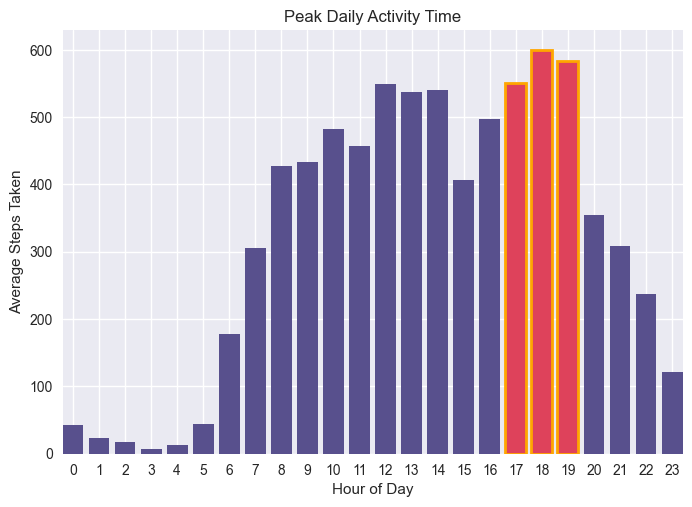

In [463]:
#Most active time of day (hour) and least active time of day?
hour_day = grouped_steps['ActivityHour']
steps_taken = grouped_steps['StepTotal']
largest = list(grouped_steps['StepTotal'].nlargest(3))

#Bar Colors
colors = ['#de425b' if x in largest else '#58508d' for x in steps_taken]
linewidths = [2 if x in largest else 0 for x in steps_taken]

plt.bar(hour_day.index, steps_taken, color=colors, linewidth=linewidths, edgecolor='#ffa600')

plt.xlabel('Hour of Day')
plt.ylabel('Average Steps Taken')
plt.title('Peak Daily Activity Time')
plt.xticks(hour_day)
plt.margins(x=0)

plt.show()


##### **Most active time of day (hour) and least active time of day?**
The peak hours for physical activity typically occur between 5 PM and 7 PM, which coincides with the end of the traditional workday when people have more time for exercise. Conversely, there is a decrease in activity levels around 3 PM, possibly due to the post-lunch energy dip.

Interestingly, activity levels start to rise around 6 AM, indicating that most participants are awake and potentially starting their day. However, between 6 AM and 8 AM, there is a relative decrease in the number of steps taken, suggesting that exercise is not a common part of the morning routines for many individuals.

The majority of daily physical activity tends to take place between 7 AM and 11 PM, which corresponds to the average time spent in bed duration of around 7.64 hours noted earlier.

In [446]:
#which intensity of activity most common?
grouped_intensity = intensity_minute['Intensity'].value_counts()
grouped_intensity.head()

0    1112102
1     180891
3      19838
2      12749
Name: Intensity, dtype: int64

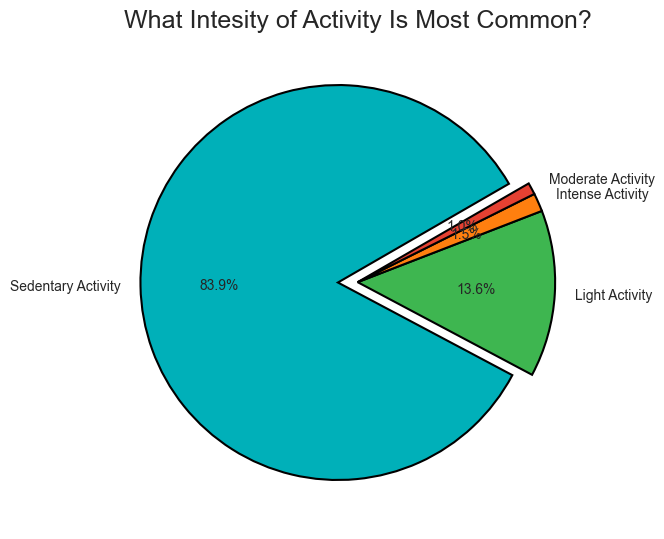

In [449]:
#which intensity of activity most common?
colors = ['#00B0B9', '#3EB650', '#FF7F0F', '#E54132']
pie_labels = ['Sedentary Activity', 'Light Activity', 'Intense Activity','Moderate Activity']
explode = [0.1,0,0,0]
plt.pie( grouped_intensity, labels=pie_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'},
    startangle=30, colors=colors, explode = explode)

plt.title('What Intesity of Activity Is Most Common?', fontsize=18)

plt.tight_layout()

plt.show()


##### **Which Intensity of Activity Is Most Common?**
The majority of the recorded activity, accounting for 83.9%, falls within the sedentary category, followed by light activity at 13.6%. This distribution aligns with the nature of step measurement, as most steps are taken for routine tasks and daily activities.

However, what stands out is that both moderate and intense activities each constitute less than 2% of the recorded activity. This suggests that a significant portion of users may not be actively engaging in rigorous exercise or may not be primarily using their wearables for tracking fitness goals. Instead, they may be using these wearables more for visualizing their daily activity patterns, including steps taken during routine tasks and light activities.

In [47]:
inten_min = intensity_minute.groupby([intensity_minute['ActivityMinute'].dt.date,intensity_minute['Id']]).mean(numeric_only = True)
inten_min = inten_min.reset_index()

inten_min['ActivityMinute'] = pd.to_datetime(inten_min['ActivityMinute'],format= '%Y-%m-%d')
activity_new_merge = inten_min.merge(activity_merged,how ='inner',left_on= ['ActivityMinute','Id'],right_on = ['ActivityDate','Id'])

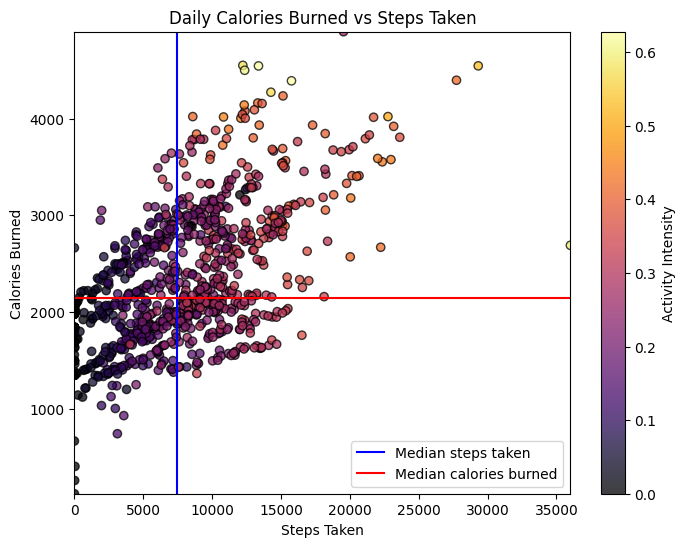

In [79]:
daily_activity = activity_new_merge['TotalSteps']
daily_calories = activity_new_merge['Calories']
daily_intensity = activity_new_merge['Intensity']

median_activity = activity_new_merge['TotalSteps'].median()
median_calories = activity_new_merge['Calories'].median()

plt.figure(figsize=(8, 6))  # Size of chart

plt.scatter( daily_activity,daily_calories,
            alpha = 0.75, c = daily_intensity, 
            cmap = "inferno",edgecolor='black')

plt.axvline(x=median_activity, color = "Blue", label = "Median steps taken")
plt.axhline(y=median_calories, color = "Red", label = "Median calories burned")

cbar = plt.colorbar()
cbar.set_label('Activity Intensity')
plt.xlabel('Steps Taken')
plt.ylabel('Calories Burned')
plt.margins(x=0,y=0)
plt.title('Daily Calories Burned vs Steps Taken')
plt.legend()
plt.tight_layout()
plt.show()

##### **Calories burned vs Steps Taken**
There is a clear positive correlation between the number of steps taken and the calories burned by a user. In simple terms, as users take more steps, they burn more calories.

We observed that the intensity of calories burned increases within a specific range of steps, notably from 0 to 15,000 steps. Beyond 15,000 steps, the calorie burn rate tends to level off or decrease. This suggests that there might be an optimal range for calorie burn efficiency during physical activity.

During our analysis, we identified a few outliers in the data:
1. Instances where zero steps were recorded, calories were still being burned above the median calories.
2. In one observation, a user took over 35,000 steps but burned less than 3,000 calories.

These outliers could be attributed to various factors, including natural data variation, changes in a user's activity pattern, or potential errors in data collection such as miscalculations, data contamination, or human error.

In [603]:
#Overall Statistics - Overall Steps walked
activity_merged.describe().applymap(lambda x: f'{x:.2f}')

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00
mean,4855407369.33,7637.91,5.49,5.48,0.11,1.50,0.57,3.34,0.00,21.16,13.56,192.81,991.21,2303.61
std,2424805475.66,5087.15,3.92,3.91,0.62,2.66,0.88,2.04,0.01,32.84,19.99,109.17,301.27,718.17
min,1503960366.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2320127002.00,3789.75,2.62,2.62,0.00,0.00,0.00,1.95,0.00,0.00,0.00,127.00,729.75,1828.50
50%,4445114986.00,7405.50,5.24,5.24,0.00,0.21,0.24,3.36,0.00,4.00,6.00,199.00,1057.50,2134.00
75%,6962181067.00,10727.00,7.71,7.71,0.00,2.05,0.80,4.78,0.00,32.00,19.00,264.00,1229.50,2793.25
max,8877689391.00,36019.00,28.03,28.03,4.94,21.92,6.48,10.71,0.11,210.00,143.00,518.00,1440.00,4900.00


##### **Overall Average Steps Walked Daily**
On average, users logged 7,637 steps or 5.4km which is below the recommendation. As recommended by CDC, an adult has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. [Source: Medical News Today article](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)

# STEP 6: ACT
Based on the health trends identified, these are the recommendation we would make to guide marketing strategy of the Leaf, Time and Spring product lines:

Sleep Efficiency Insights:
- Given the finding that users spend 40 minutes awake or restless whilst in bed each day, consider marketing sleep-related features. Promote sleep tracking, personalized sleep recommendations, or relaxation techniques within the app to help users improve sleep quality.  
- Enhance the sleep tracking functionality to provide more detailed insights into sleep patterns and disturbances. Provide users with actionable tips to reduce wakefulness and restlessness, such as adjusting bedtime routines or environment.
- Detecting if a user is awake in bed and reminding them to go to sleep may allow more time towards sleep. 
- Address the weak negative correlation between daily exercise (steps) and sleep hours cautiously. Instead of discouraging exercise, emphasize the importance of balancing physical activity with adequate sleep for overall health. Use this finding to educate users about the importance of rest and recovery.Consider adding features that help users find an optimal balance between exercise and sleep. For instance, provide guidance on setting workout schedules that align with their sleep patterns.

Excercise Insights:
- Leverage the information about peak activity hours (5 PM to 7 PM) to encourage users to engage in physical activity during this period. Promote fitness challenges or group activities during these hours.
- Introduce reminders or notifications within the app to encourage users to stay active during the afternoon energy dip (around 3 PM). 
- Provide morning workout routines to cater to users who prefer to exercise in the morning and encourage others who may not have considered.
- Gameify and create challenges with leaderboards to encourage more intense excercise activites. People may want to engage in more intense activity if they feel a sense of accomplishment. 
- Emphasize the positive correlation between steps and calories burned to motivate users to reach their daily step goals. Consider running promotions or challenges that reward users for achieving certain step milestones.
- Encourage users to strive for the recommended 10,000 steps per day for general health, weight loss, and fitness improvement. Run campaigns centered around these health benefits and track user progress.
- Consider introducing personalized daily step goals based on individual fitness levels. Provide insights and rewards for users who consistently meet or exceed their goals.

Next Steps:
- Conduct a survery to capture a larger sample size whilst collecting data on user age, gender,health conditions and lifestyle factors to better understand how these variables influence health trends.
- Consider asking users to opt-in to share health data so that you can avoid self-reporting errors and gather data collected by the wearable on scale. This will be easier to gather large amounts of data free from human error on a continuos basis. 
- Continuously gather user feedback to refine product features and address specific pain points related to sleep tracking, exercise recommendations, and daily step goals.

***

